----------------------------------------------
Import dataset and necessary libraries
----------------------------------------------
----------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from scipy.stats import loguniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold

df_heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")

print(f"Number of columns: {df_heart.shape[1]}")
print(f"Number of rows: {df_heart.shape[0]}")

pd.set_option('display.width', 1000)
print(df_heart.head())

Number of columns: 13
Number of rows: 299
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0  75.0        0                       582         0                 20                    1  265000.00               1.9           130    1        0     4            1
1  55.0        0                      7861         0                 38                    0  263358.03               1.1           136    1        0     6            1
2  65.0        0                       146         0                 20                    0  162000.00               1.3           129    1        1     7            1
3  50.0        1                       111         0                 20                    0  210000.00               1.9           137    1        0     7            1
4  65.0        1                       160         1                 20                    0  327000.00          

----------------------------------------------
Verifying data types
----------------------------------------------
----------------------------------------------

In [3]:
print("Data Types:")
print(df_heart.info())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


----------------------------------------------
Checking for duplicate rows
----------------------------------------------
----------------------------------------------

In [4]:
filas_duplicadas = df_heart.duplicated().sum()

if filas_duplicadas > 0:
    print(f"Se encontraron {filas_duplicadas} duplicate rows in the train set.")
    print("Display of duplicate rows:")
    print(df_heart[df_heart.duplicated()].head())
else:
    print("No duplicate rows were found in the dataset.")

No duplicate rows were found in the dataset.


----------------------------------------------
Distribution of attributes
----------------------------------------------
----------------------------------------------

Original distributions:


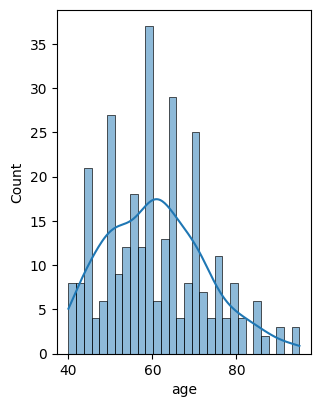

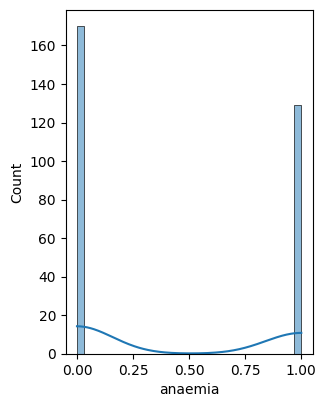

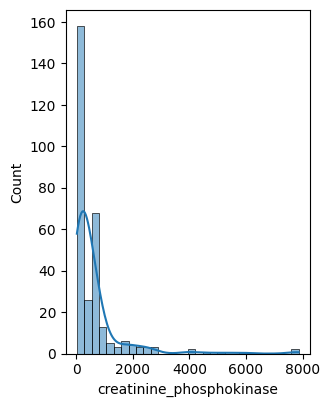

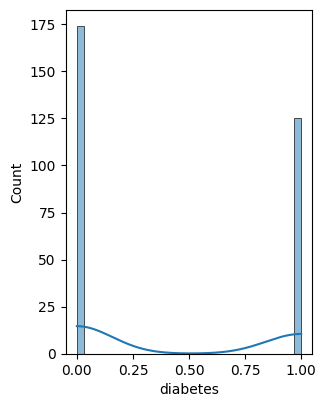

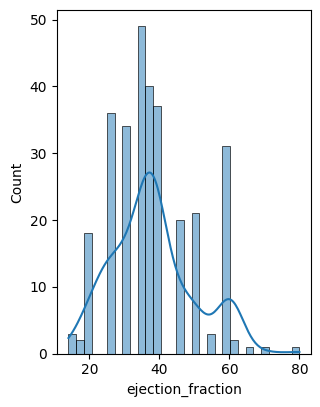

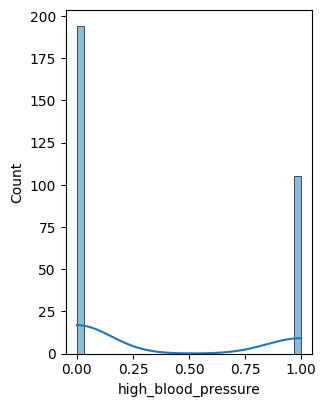

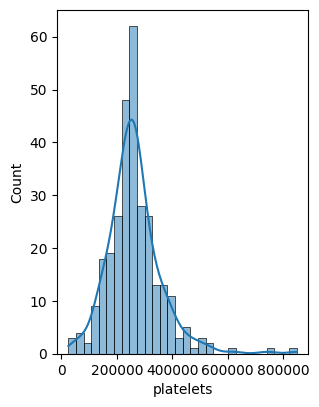

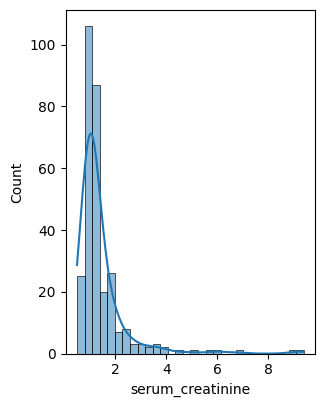

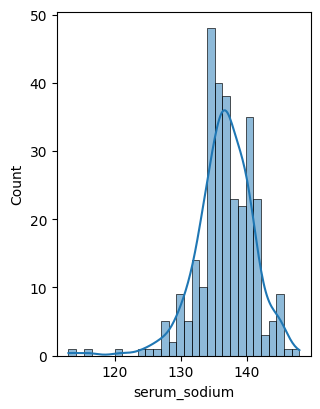

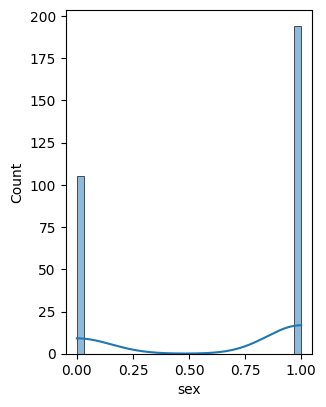

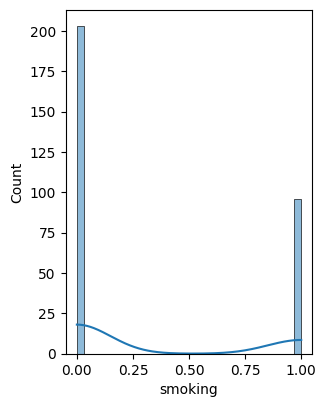

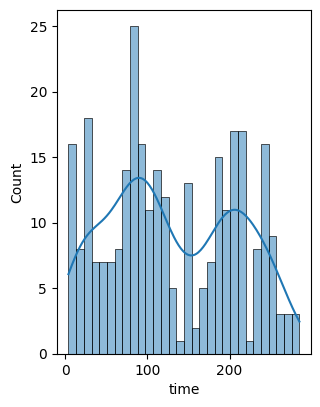

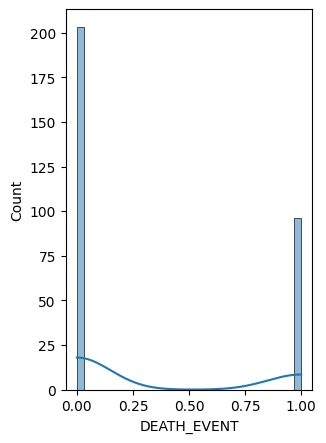

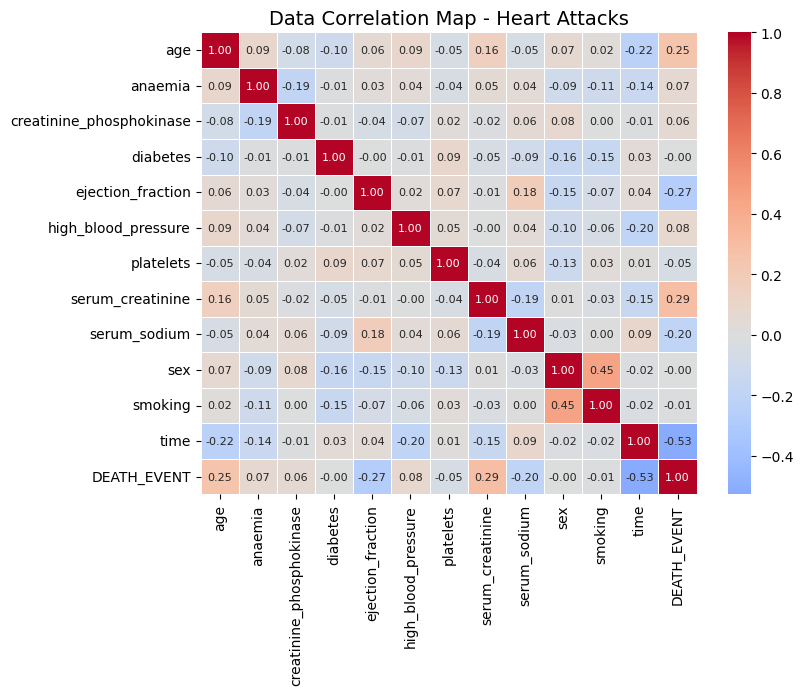

In [5]:
# Filter only numeric columns
numeric_cols = df_heart.select_dtypes(include=[np.number]).columns.tolist()

# Plot the original distributions
print("Original distributions:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6, len(numeric_cols) * 4))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    #plt.title(f'Original distribution: {col}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Heart Attacks", fontsize=14)
plt.show()

----------------------------------------------
Attribute transformations
----------------------------------------------
----------------------------------------------

Winsorize applied in column: platelets
Winsorize applied in column: serum_creatinine
Winsorize applied in column: serum_sodium


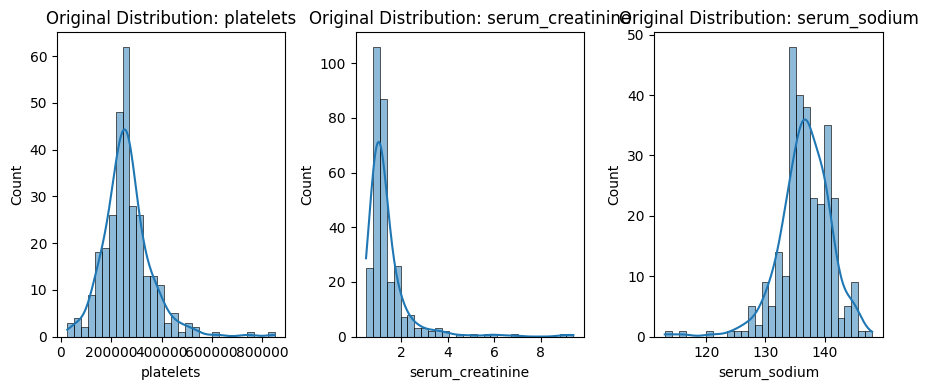

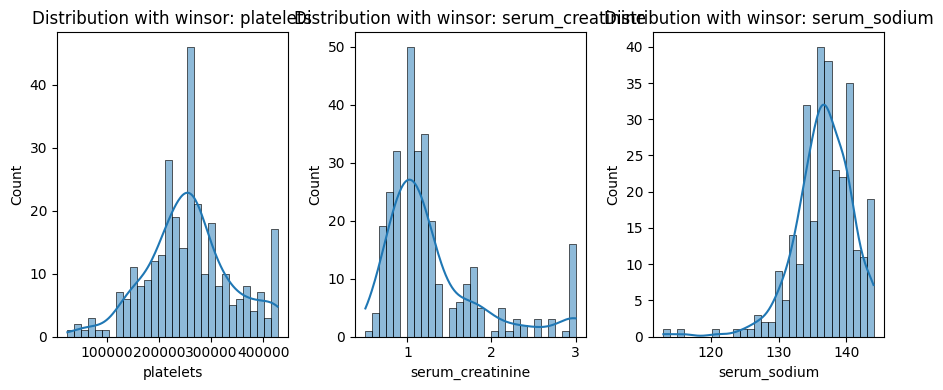

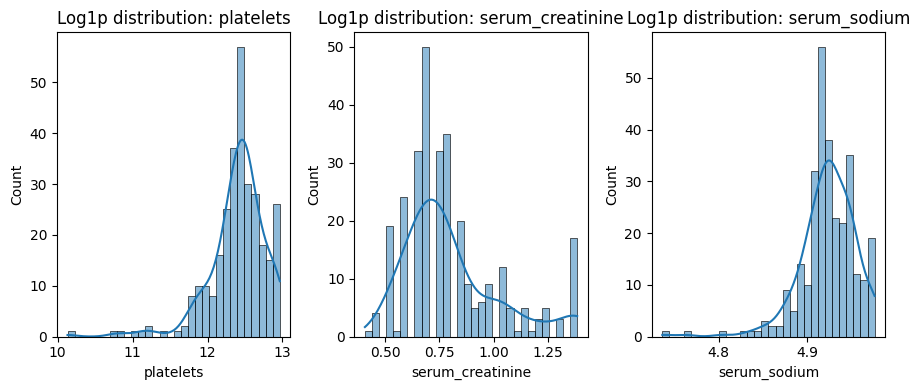

In [6]:
# Columns to transform
cols_log = ['platelets', 'serum_creatinine', 'serum_sodium']

# Apply winsorize
df_heart_winsor = df_heart.copy()
for col in cols_log:
    col_data = df_heart[col].values
    winsorized_data = winsorize(col_data, limits=[0.00, 0.05])
    df_heart_winsor[col] = winsorized_data
    print(f"Winsorize applied in column: {col}")

# Plot original distributions (after winsorizing)
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Original Distribution: {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_winsor[col], kde=True, bins=30)
    plt.title(f'Distribution with winsor: {col}')
plt.tight_layout()
plt.show()

cols_log = ['platelets', 'serum_creatinine', 'serum_sodium']

# Apply logarithmic transformation
df_heart_winsor_log = df_heart_winsor.copy()
for col in cols_log:
    df_heart_winsor_log[col] = np.log1p(df_heart_winsor_log[col])

# Plotting distributions after log1p
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_winsor_log[col], kde=True, bins=30)
    plt.title(f'Log1p distribution: {col}')
plt.tight_layout()
plt.show()

----------------------------------------------
Distributions after transformations
----------------------------------------------
----------------------------------------------

Final distributions:


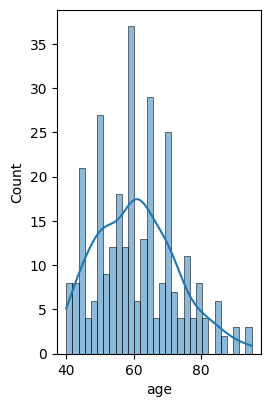

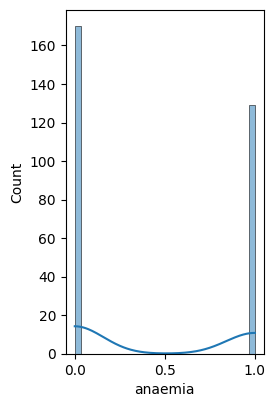

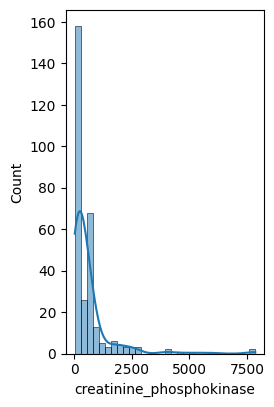

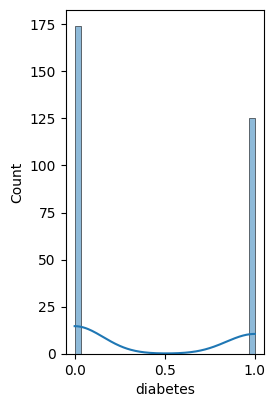

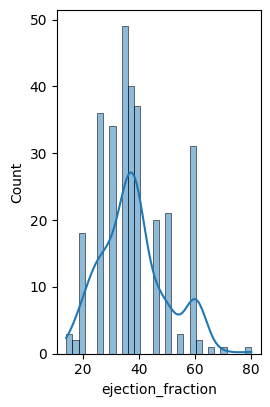

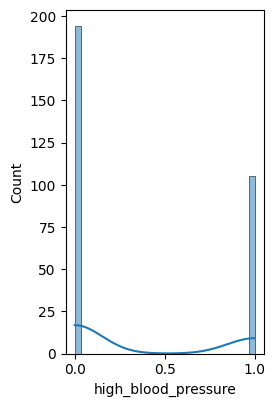

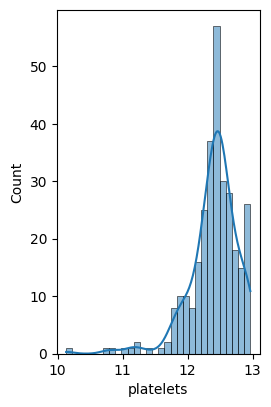

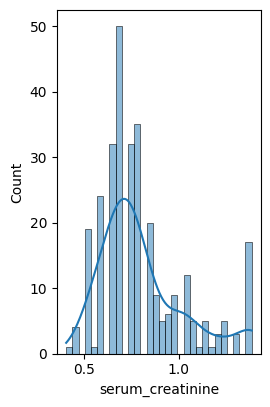

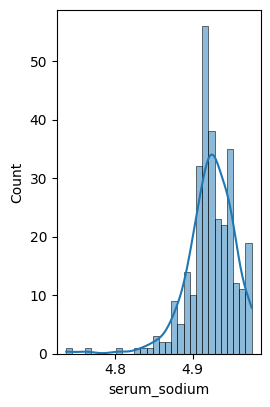

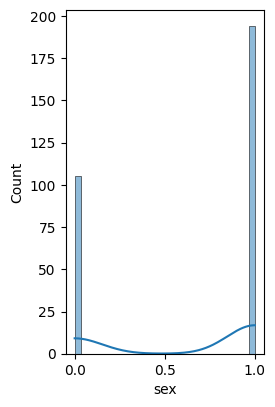

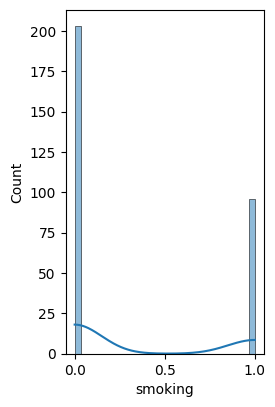

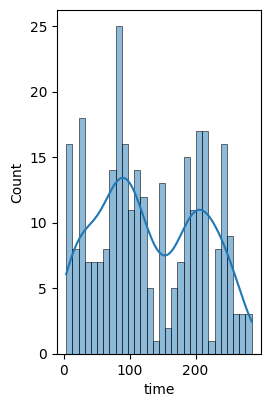

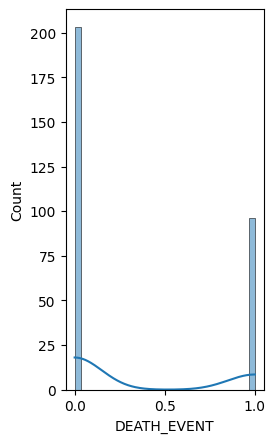

In [7]:
# Graficar las distribuciones despues de transformaciones
print("Final distributions:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(5, len(numeric_cols) * 4))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart_winsor_log[col], kde=True, bins=30)
    #plt.title(f'Final distribution: {col}')
    plt.tight_layout()
    plt.show()

----------------------------------------------
Most relevant attributes
----------------------------------------------
----------------------------------------------

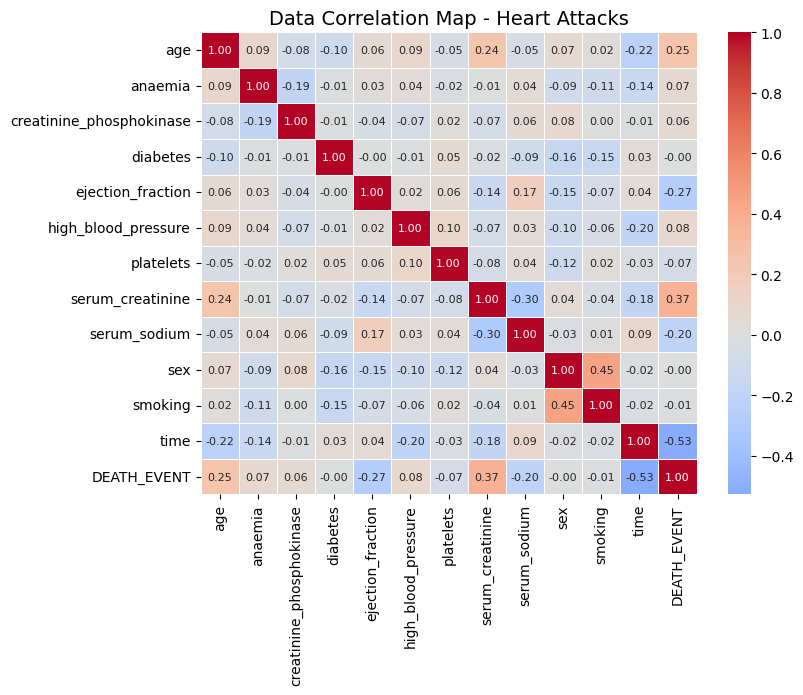

In [8]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_winsor_log.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Heart Attacks", fontsize=14)
plt.show()

C:\Users\Brandon\AppData\Local\Temp\ipykernel_12788\1164429368.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Attribute', palette='viridis')


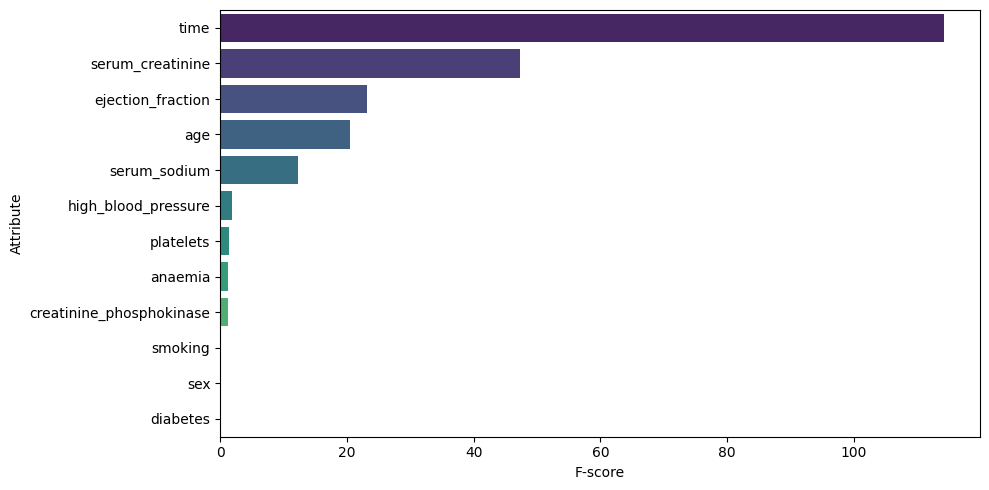

,Attribute,F-score (ANOVA),p-value
11,time,114.181264,9.122223e-23
7,serum_creatinine,47.376188,3.484765e-11
4,ejection_fraction,23.094063,2.452897e-06
0,age,20.435946,8.916763e-06
8,serum_sodium,12.325685,5.161096e-04
5,high_blood_pressure,1.881937,1.711495e-01
6,platelets,1.344289,2.472103e-01
1,anaemia,1.310096,2.532988e-01
2,creatinine_phosphokinase,1.173259,2.796112e-01
10,smoking,0.047333,8.279207e-01


In [9]:
X = df_heart_winsor_log.drop(columns=['DEATH_EVENT']) 
y = df_heart_winsor_log['DEATH_EVENT']

# Aplicar SelectKBest con ANOVA F-score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Resultados en Dataframe
anova_scores = pd.DataFrame({
    'Attribute': X.columns,
    'F-score (ANOVA)': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score (ANOVA)', ascending=False)

# Grafica de resultados
plt.figure(figsize=(10, 5))
sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Attribute', palette='viridis')
#plt.title('Importance of attributes according to ANOVA F-score')
plt.xlabel('F-score')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()

anova_scores

----------------------------------------------
Selection of the Most Relevant Attributes
----------------------------------------------
----------------------------------------------

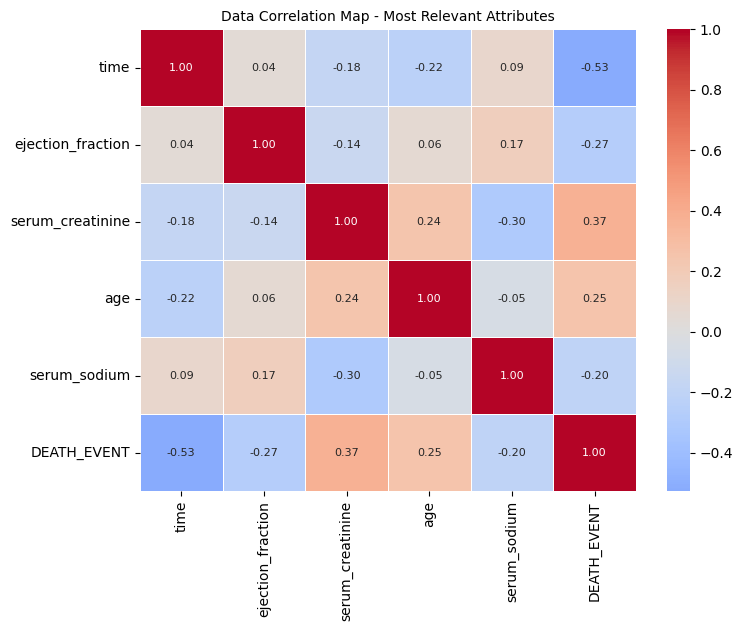

In [10]:
relevant_attributes = ['time', 'ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium', 'DEATH_EVENT']
df_heart_winsor_log_filt = df_heart_winsor_log[relevant_attributes]

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_winsor_log_filt.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Most Relevant Attributes", fontsize=10)
plt.show()

----------------------------------------------
Dataset splitting and data normalization
----------------------------------------------
----------------------------------------------

In [12]:
attribute = 'DEATH_EVENT'
X = df_heart_winsor_log_filt.drop(columns=[attribute])
Y = df_heart_winsor_log_filt.DEATH_EVENT

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=16)
print(X)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("Split and normalized dataset")

joblib.dump(scaler, 'model_standardscaler.pkl')
print("Modelo exportado correctamente.")

     time  ejection_fraction  serum_creatinine   age  serum_sodium
0       4                 20          1.064711  75.0      4.875197
1       6                 38          0.741937  55.0      4.919981
2       7                 20          0.832909  65.0      4.867534
3       7                 20          1.064711  50.0      4.927254
4       8                 20          1.308333  65.0      4.762174
..    ...                ...               ...   ...           ...
294   270                 38          0.741937  62.0      4.969813
295   271                 38          0.788457  55.0      4.941642
296   278                 60          0.587787  45.0      4.934474
297   280                 38          0.875469  45.0      4.948760
298   285                 45          0.955511  50.0      4.919981

[299 rows x 5 columns]
Split and normalized dataset
Modelo exportado correctamente.


----------------------------------------------
Hyperparameter Tuning
----------------------------------------------
----------------------------------------------

In [15]:
# Grid Search
# Logistic Regression Model
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controls the penalty applied to coefficient sizes; higher values mean less regularization
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms for logistic regression
    'max_iter': [100, 200, 300, 500, 1000],  # Maximum number of iterations for convergence
    'class_weight': [None, 'balanced'],  # Handling imbalanced classes
    'penalty': ['l2']  # Type of regularization to apply; l2 is Ridge regularization
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000),  # Base model for Logistic Regression
    param_grid=param_grid_log,  # Hyperparameters to evaluate
    scoring='accuracy',  # Metric to use for evaluating model performance
    cv=10,  # Number of folds for cross-validation (10 folds)
    n_jobs=-1,  # Use all available cores for processing
    verbose=1  # Show GridSearch progress
)

print("Grid Search: Logistic Regression")
grid_log.fit(X_train_norm, Y_train)
print("Best parameters:", grid_log.best_params_)
print("Best score:", grid_log.best_score_)  # Ensure the best score is printed

# Obtain the standard deviation of the best model
res_log = pd.DataFrame(grid_log.cv_results_)
best_idx_log = grid_log.best_index_
std_best_log = res_log.loc[best_idx_log, 'std_test_score']
print("Standard deviation (CV test) of the best model:", std_best_log)

best_log_model_grid = grid_log.best_estimator_
joblib.dump(best_log_model_grid, 'best_log_model_grid.pkl')
print("Model exported.")

# Naive Bayes Model
param_grid_naive = {
    'var_smoothing': list(np.logspace(-15, -5, 15)) + list(np.logspace(-11, -5, 10)) + [1e-9, 1e-8, 1e-7, 1e-6],  # Variance smoothing
    'priors': [None, [0.3, 0.7], [0.5, 0.5]]  # Example for binary classification
}

grid_search_naive = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_naive,
    scoring='accuracy',
    cv=10,  # Ensure 10 folds
)

print("\nGrid Search: Naive Bayes")
grid_search_naive.fit(X_train_norm, Y_train)
print("Best hyperparameters:", grid_search_naive.best_params_)
print("Best score:", grid_search_naive.best_score_)

# Obtain the standard deviation of the best model
res_nb = pd.DataFrame(grid_search_naive.cv_results_)
best_idx_nb = grid_search_naive.best_index_
std_best_nb = res_nb.loc[best_idx_nb, 'std_test_score']
print("Standard deviation (CV test) of the best model:", std_best_nb)

best_naive_model_grid = grid_search_naive.best_estimator_
joblib.dump(best_naive_model_grid, 'best_naive_model_grid.pkl')
print("Model exported.")

# KNN Model
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 29, 21, 23, 25, 27, 29, 31],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function (uniform or distance-based)
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming', 'braycurtis']  # Distance metrics
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=10,  # 10 folds
)
print("\nGrid Search: KNN")
grid_search_knn.fit(X_train_norm, Y_train)
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)

# Obtain the standard deviation of the best model
res_knn = pd.DataFrame(grid_search_knn.cv_results_)
best_idx_knn = grid_search_knn.best_index_
std_best_knn = res_knn.loc[best_idx_knn, 'std_test_score']
print("Standard deviation (CV test) of the best model:", std_best_knn)

best_knn_model_grid = grid_search_knn.best_estimator_
joblib.dump(best_knn_model_grid, 'best_knn_model_grid.pkl')
print("Model exported.")

# SVM Model
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Parameter for RBF kernel
    'degree': [3, 4, 5],  # Only applies if kernel = 'poly'
    'class_weight': [None, 'balanced']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=10, scoring='accuracy')  # 10 folds
grid_search_svm.fit(X_train_norm, Y_train)
print("\nGrid Search: SVM")
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Best score:", grid_search_svm.best_score_)

# Obtain the standard deviation of the best model
res_svm = pd.DataFrame(grid_search_svm.cv_results_)
best_idx_svm = grid_search_svm.best_index_
std_best_svm = res_svm.loc[best_idx_svm, 'std_test_score']
print("Standard deviation (CV test) of the best model:", std_best_svm)
best_svm_model_grid = grid_search_svm.best_estimator_
joblib.dump(best_svm_model_grid, 'best_svm_model_grid.pkl')
print("Model exported.")

# Decision Tree Model
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 10, 20, None],  # Maximum tree depth
    'min_samples_split': [2, 3, 4, 5, 6, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],  # Minimum samples per leaf
    'max_features': [None, 'sqrt', 'log2'],  # Maximum features to consider at each split
    'criterion': ['gini', 'entropy'],  # Criterion to split nodes
    'class_weight': [None, 'balanced'],  # For handling imbalanced classes
    'splitter': ['best', 'random'],
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, cv=10, scoring='accuracy')  # 10 folds
grid_search_tree.fit(X_train_norm, Y_train)
print("\nGrid Search: Decision Trees")
print("Best hyperparameters:", grid_search_tree.best_params_)
print("Best score:", grid_search_tree.best_score_)

# Obtain the standard deviation of the best model
res_tree = pd.DataFrame(grid_search_tree.cv_results_)
best_idx_tree = grid_search_tree.best_index_
std_best_tree = res_tree.loc[best_idx_tree, 'std_test_score']
print("Standard deviation (CV test) of the best model:", std_best_tree)

best_tree_model_grid = grid_search_tree.best_estimator_
joblib.dump(best_tree_model_grid, 'best_tree_model_grid.pkl')
print("Model exported.")

# Multilayer Perceptron Model
param_grid_mlp = {
    #'hidden_layer_sizes': [(10), (50), (100), (10, 50), (50, 100), (100, 50), (50, 50), (10, 10, 10), (150, 75)],
    'hidden_layer_sizes': [(10), (25), (50), (10, 25), (25, 50), (50, 25), (25, 25), (10, 10, 10), (10, 10), (75, 35)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(
    MLPClassifier(max_iter=2000),  # Base model for MLP
    param_grid=param_grid_mlp,  # Hyperparameters to evaluate
    scoring='accuracy',  # Metric to use for evaluating model performance
    cv=10,  # Number of folds for cross-validation (10 folds)
    n_jobs=-1,  # Use all available cores for processing
    verbose=1  # Show GridSearch progress
)

print("\nGrid Search: MLP")
grid_mlp.fit(X_train_norm, Y_train)
print("Best parameters:", grid_mlp.best_params_)
print("Best score:", grid_mlp.best_score_)  # Ensure the best score is printed

# Obtain the standard deviation of the best model
res_mlp = pd.DataFrame(grid_mlp.cv_results_)
best_idx_mlp = grid_mlp.best_index_
std_best_mlp = res_mlp.loc[best_idx_mlp, 'std_test_score']
print("Standard deviation (CV test) of the best model:", std_best_mlp)

best_mlp_model_grid = grid_mlp.best_estimator_
joblib.dump(best_mlp_model_grid, 'best_mlp_model_grid.pkl')
print("Model exported.")

Grid Search: Logistic Regression
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8159420289855073
Standard deviation (CV test) of the best model: 0.049805334137506034
Model exported.

Grid Search: Naive Bayes
Best hyperparameters: {'priors': None, 'var_smoothing': np.float64(1e-15)}
Best score: 0.7992753623188406
Standard deviation (CV test) of the best model: 0.06890633777703842
Model exported.

Grid Search: KNN
Best hyperparameters: {'metric': 'braycurtis', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.7992753623188406
Standard deviation (CV test) of the best model: 0.06088034756123395
Model exported.

Grid Search: SVM
Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.8326086956521739
Standard deviation (CV test) of the best model: 0.04172333890080846
Model exported.

Grid Searc

----------------------------------------------
Results with test data
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.883333   0.881723  0.883333  0.882236
Naive Bayes          0.850000   0.847727  0.850000  0.848589
KNN                  0.833333   0.840608  0.833333  0.835979
SVM                  0.800000   0.845714  0.800000  0.808791
Decision Tree        0.766667   0.849870  0.766667  0.778183
MLP                  0.866667   0.873000  0.866667  0.868783


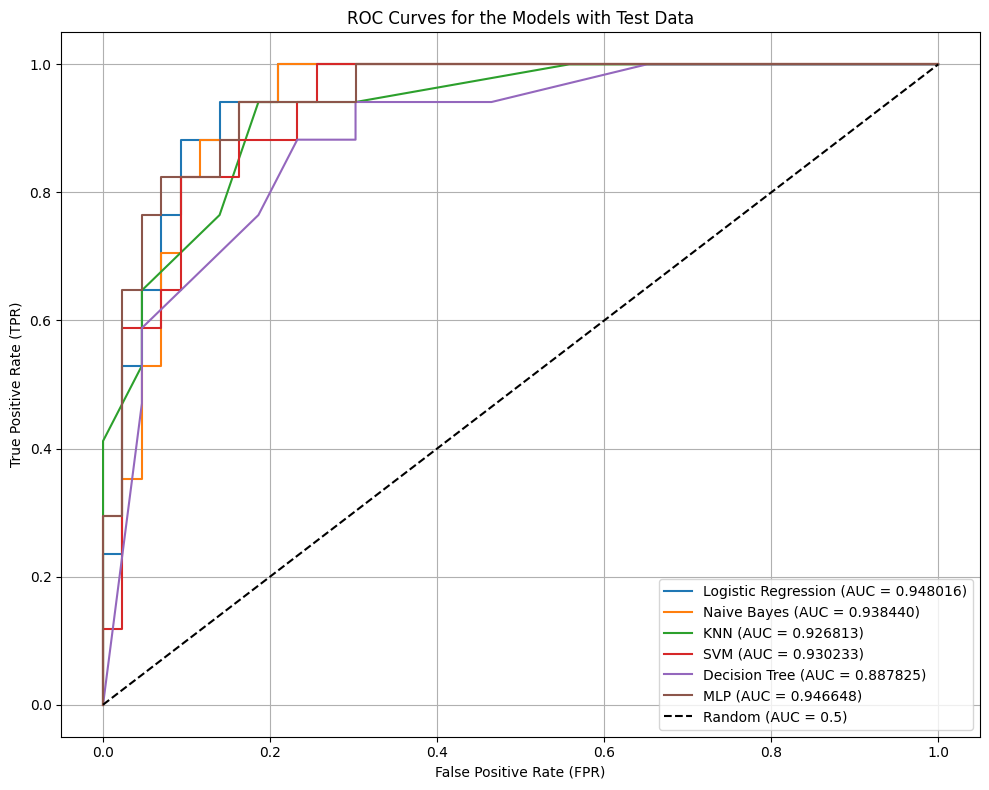

In [13]:
# Dictionary with the models to evaluate
models = {
    "Logistic Regression": joblib.load("best_log_model_grid.pkl"),
    "Naive Bayes": joblib.load("best_naive_model_grid.pkl"),
    "KNN": joblib.load("best_knn_model_grid.pkl"),
    "SVM": joblib.load("best_svm_model_grid.pkl"),
    "Decision Tree": joblib.load("best_tree_model_grid.pkl"),
    "MLP": joblib.load("best_mlp_model_grid.pkl")
}

# Create a dictionary to store metrics
metrics = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test_norm)

    # Save metrics
    metrics[name] = {
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, average='weighted'),
        "Recall": recall_score(Y_test, y_pred, average='weighted'),
        "F1-score": f1_score(Y_test, y_pred, average='weighted')
    }

# Display metrics in table format
df_metrics = pd.DataFrame(metrics).T
print(df_metrics)

# ROC curves

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_norm)[:, 1]
    else:
        y_scores = model.decision_function(X_test_norm)

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.6f})")

# Random curve
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.title('ROC Curves for the Models with Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
Results with train data
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.824268   0.784615  0.645570  0.708333
Naive Bayes          0.807531   0.746269  0.632911  0.684932
KNN                  0.841004   0.735632  0.810127  0.771084
SVM                  0.845188   0.714286  0.886076  0.790960
Decision Tree        0.841004   0.695238  0.924051  0.793478
MLP                  0.916318   0.915493  0.822785  0.866667


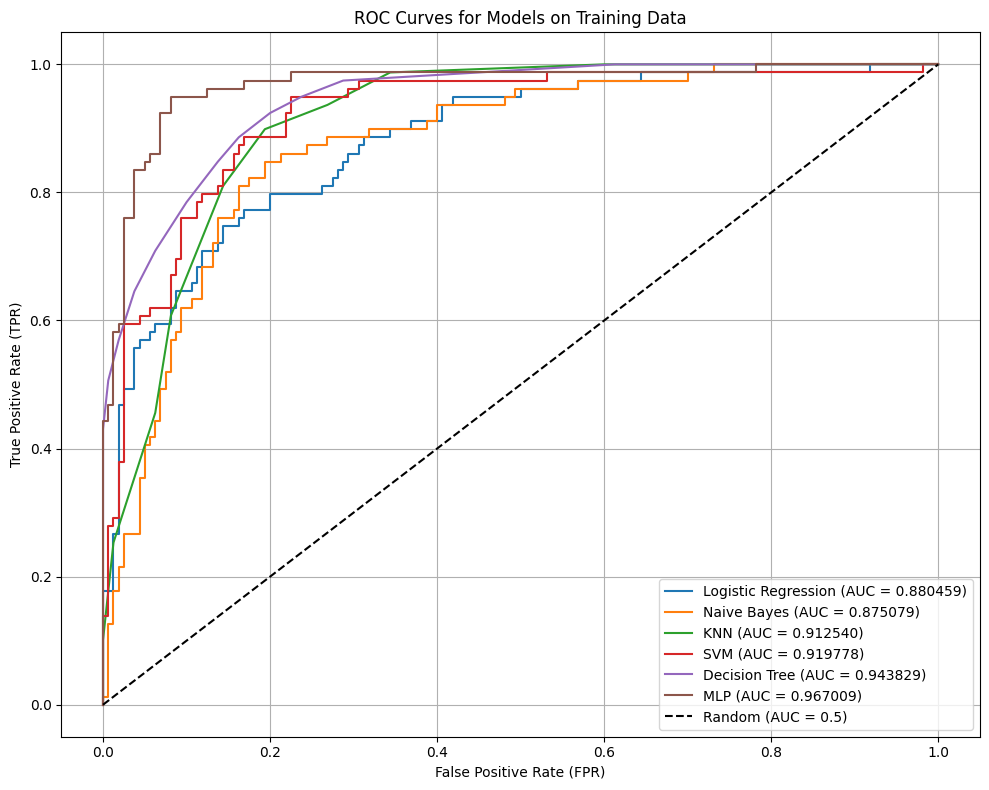

In [14]:
# Create a dictionary to store training metrics
training_metrics = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_train_norm)

    # Save metrics
    training_metrics[name] = {
        "Accuracy": accuracy_score(Y_train, y_pred),
        "Precision": precision_score(Y_train, y_pred),
        "Recall": recall_score(Y_train, y_pred),
        "F1-score": f1_score(Y_train, y_pred)
    }

# Display metrics in table format
df_training_metrics = pd.DataFrame(training_metrics).T
print(df_training_metrics)

# ROC curves

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_train_norm)[:, 1]
    else:
        y_scores = model.decision_function(X_train_norm)

    fpr, tpr, _ = roc_curve(Y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.6f})")  # showing 5 decimal places

# Random curve
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.title('ROC Curves for Models on Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


----------------------------------------------
Ensamble Results
----------------------------------------------
----------------------------------------------

### RandomForest

In [20]:
#======================================================
# BASE MODELS
#======================================================

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.01, class_weight=None, max_iter=100, penalty='l2', solver='lbfgs', random_state=16)),
    ('Naive Bayes', GaussianNB(priors=None, var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='braycurtis', n_neighbors=9, weights='uniform')),
    # ('SVM', SVC(C=1, class_weight='balanced', degree=3, gamma=0.1, kernel='rbf', probability=True)),
    # ('Decision Trees', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, splitter='best', random_state=16)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=2000, activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate='constant', solver='adam', random_state=16)),
]

#======================================================
# METAMODEL
#======================================================

meta_model_name = 'RandomForest'
meta_model = RandomForestClassifier(n_estimators=300, min_samples_split=3, max_depth=10,min_samples_leaf=5,random_state=16)


#======================================================
# CONFIGURATION 31 EXECUTIONS
#======================================================

N_RUNS = 31
SEEDS  = list(range(N_RUNS))   
N_SPLITS = 10  


def metrics_block(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except Exception:
        auc = np.nan
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc, "tp": int(tp), "fp": int(fp), "tn": int(tn), "fn": int(fn)}

rows = []

best_accuracy = -np.inf
best_model = None
best_run = None

for run_idx, seed in enumerate(SEEDS):
    cv_strategy = KFold(n_splits=N_SPLITS, shuffle=True, random_state=seed)

    # Stacking 
    model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        cv=cv_strategy,
        n_jobs=1
    )

    # Training model
    model.fit(X_train_norm, Y_train)

    # --- TEST ---
    y_pred_te  = model.predict(X_test_norm)
    y_proba_te = model.predict_proba(X_test_norm)[:, 1]
    m_te = metrics_block(Y_test, y_pred_te, y_proba_te)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TEST", **m_te})

    # --- TRAIN ---
    y_pred_tr  = model.predict(X_train_norm)
    y_proba_tr = model.predict_proba(X_train_norm)[:, 1]
    m_tr = metrics_block(Y_train, y_pred_tr, y_proba_tr)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TRAIN", **m_tr})
    
    if m_te["accuracy"] > best_accuracy:
        best_accuracy = m_te["accuracy"]
        best_model = model
        best_run = run_idx

# ======= Save CSV =======
df_runs = pd.DataFrame(rows)
df_runs.to_csv(f"runs_ensambles_31_{meta_model_name}.csv", index=False)
print(f"Guardado: runs_ensambles_31_{meta_model_name}.csv")

joblib.dump(best_model, f"ensemble_RandomForest_dataset3.joblib")
print(f"Mejor modelo guardado: ensemble_RandomForest_dataset3{best_run}.joblib con Accuracy = {best_accuracy:.4f}")

# ======= Abstract (mean y median) =======
metrics = ["accuracy", "precision", "recall", "f1", "auc"]
df_mean   = df_runs.groupby(["model_name", "set"])[metrics].mean().add_suffix("_mean")
df_median = df_runs.groupby(["model_name", "set"])[metrics].median().add_suffix("_median")
df_summary = pd.concat([df_mean, df_median], axis=1).reset_index()
df_summary.to_csv(f"summary_ensambles_mean_median_{meta_model_name}.csv", index=False)
print(f"Guardado: summary_ensambles_mean_median_{meta_model_name}.csv")
print(df_summary)

Guardado: runs_ensambles_31_RandomForest.csv
Mejor modelo guardado: ensemble_RandomForest_dataset323.joblib con Accuracy = 0.9333
Guardado: summary_ensambles_mean_median_RandomForest.csv
     model_name    set  accuracy_mean  precision_mean  recall_mean   f1_mean  auc_mean  accuracy_median  precision_median  recall_median  f1_median  auc_median
0  RandomForest   TEST       0.902688        0.826318     0.833017  0.829144  0.948943         0.900000          0.823529       0.823529   0.823529    0.949384
1  RandomForest  TRAIN       0.894723        0.872615     0.798693  0.833627  0.963740         0.895397          0.871429       0.797468   0.834437    0.964003


### XGBoost

In [21]:
#======================================================
# BASE MODELS
#======================================================

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.01, class_weight=None, max_iter=100, penalty='l2', solver='lbfgs', random_state=16)),
    ('Naive Bayes', GaussianNB(priors=None, var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='braycurtis', n_neighbors=9, weights='uniform')),
    ('SVM', SVC(C=1, class_weight='balanced', degree=3, gamma=0.1, kernel='rbf', probability=True)),
    # ('Decision Trees', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, splitter='best', random_state=16)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=2000, activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate='constant', solver='adam', random_state=16)),
]

#======================================================
# METAMODEL
#======================================================

meta_model_name = 'XGBoost'
meta_model = XGBClassifier(reg_lambda= 60, random_state=16, max_depth= 10, n_jobs=1)


#======================================================
# CONFIGURATION 31 EXECUTIONS
#======================================================

N_RUNS = 31
SEEDS  = list(range(N_RUNS))   
N_SPLITS = 10  


def metrics_block(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except Exception:
        auc = np.nan
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc, "tp": int(tp), "fp": int(fp), "tn": int(tn), "fn": int(fn)}

rows = []

best_accuracy = -np.inf
best_model = None
best_run = None

for run_idx, seed in enumerate(SEEDS):
    cv_strategy = KFold(n_splits=N_SPLITS, shuffle=True, random_state=seed)

    # Stacking 
    model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        cv=cv_strategy,
        n_jobs=1
    )

    # Training model
    model.fit(X_train_norm, Y_train)

    # --- TEST ---
    y_pred_te  = model.predict(X_test_norm)
    y_proba_te = model.predict_proba(X_test_norm)[:, 1]
    m_te = metrics_block(Y_test, y_pred_te, y_proba_te)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TEST", **m_te})

    # --- TRAIN ---
    y_pred_tr  = model.predict(X_train_norm)
    y_proba_tr = model.predict_proba(X_train_norm)[:, 1]
    m_tr = metrics_block(Y_train, y_pred_tr, y_proba_tr)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TRAIN", **m_tr})
    
    if m_te["accuracy"] > best_accuracy:
        best_accuracy = m_te["accuracy"]
        best_model = model
        best_run = run_idx

# ======= Save CSV =======
df_runs = pd.DataFrame(rows)
df_runs.to_csv(f"runs_ensambles_31_{meta_model_name}.csv", index=False)
print(f"Guardado: runs_ensambles_31_{meta_model_name}.csv")

joblib.dump(best_model, f"ensemble_XGBoost_dataset3.joblib")
print(f"Mejor modelo guardado: ensemble_XGBoost_dataset3{best_run}.joblib con Accuracy = {best_accuracy:.4f}")

# ======= Abstract (mean y median) =======
metrics = ["accuracy", "precision", "recall", "f1", "auc"]
df_mean   = df_runs.groupby(["model_name", "set"])[metrics].mean().add_suffix("_mean")
df_median = df_runs.groupby(["model_name", "set"])[metrics].median().add_suffix("_median")
df_summary = pd.concat([df_mean, df_median], axis=1).reset_index()
df_summary.to_csv(f"summary_ensambles_mean_median_{meta_model_name}.csv", index=False)
print(f"Guardado: summary_ensambles_mean_median_{meta_model_name}.csv")
print(df_summary)

Guardado: runs_ensambles_31_XGBoost.csv
Mejor modelo guardado: ensemble_XGBoost_dataset328.joblib con Accuracy = 0.9167
Guardado: summary_ensambles_mean_median_XGBoost.csv
  model_name    set  accuracy_mean  precision_mean  recall_mean   f1_mean  auc_mean  accuracy_median  precision_median  recall_median  f1_median  auc_median
0    XGBoost   TEST       0.885484        0.777357     0.836812  0.805572  0.929924         0.883333          0.777778       0.823529   0.800000    0.932969
1    XGBoost  TRAIN       0.906330        0.868459     0.844835  0.856235  0.967713         0.903766          0.871795       0.848101   0.855346    0.968275


### GradientBoost

In [22]:
#======================================================
# BASE MODELS 
#======================================================

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.01, class_weight=None, max_iter=100, penalty='l2', solver='lbfgs', random_state=16)),
    ('Naive Bayes', GaussianNB(priors=None, var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='braycurtis', n_neighbors=9, weights='uniform')),
    ('SVM', SVC(C=1, class_weight='balanced', degree=3, gamma=0.1, kernel='rbf', probability=True)),
    # ('Decision Trees', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, splitter='best', random_state=16)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=2000, activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate='constant', solver='adam', random_state=16)),
]

#======================================================
# METAMODEL
#======================================================

meta_model_name = 'GradientBoost'
meta_model = GradientBoostingClassifier(subsample= 0.9, learning_rate=0.03, max_depth= 6, min_samples_leaf= 20, validation_fraction=0.1 , random_state=16)


#======================================================
# CONFIGURATION 31 EXECUTIONS
#======================================================

N_RUNS = 31
SEEDS  = list(range(N_RUNS))   
N_SPLITS = 10  


def metrics_block(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except Exception:
        auc = np.nan
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc, "tp": int(tp), "fp": int(fp), "tn": int(tn), "fn": int(fn)}

rows = []

best_accuracy = -np.inf
best_model = None
best_run = None

for run_idx, seed in enumerate(SEEDS):
    cv_strategy = KFold(n_splits=N_SPLITS, shuffle=True, random_state=seed)

    # Stacking 
    model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        cv=cv_strategy,
        n_jobs=1
    )

    # Training model
    model.fit(X_train_norm, Y_train)

    # --- TEST ---
    y_pred_te  = model.predict(X_test_norm)
    y_proba_te = model.predict_proba(X_test_norm)[:, 1]
    m_te = metrics_block(Y_test, y_pred_te, y_proba_te)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TEST", **m_te})

    # --- TRAIN ---
    y_pred_tr  = model.predict(X_train_norm)
    y_proba_tr = model.predict_proba(X_train_norm)[:, 1]
    m_tr = metrics_block(Y_train, y_pred_tr, y_proba_tr)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TRAIN", **m_tr})

    if m_te["accuracy"] > best_accuracy:
        best_accuracy = m_te["accuracy"]
        best_model = model
        best_run = run_idx

# ======= Save CSV =======
df_runs = pd.DataFrame(rows)
df_runs.to_csv(f"runs_ensambles_31_{meta_model_name}.csv", index=False)
print(f"Guardado: runs_ensambles_31_{meta_model_name}.csv")

joblib.dump(best_model, f"ensemble_GradientBoost_dataset3.joblib")
print(f"Mejor modelo guardado: ensemble_GradientBoost_dataset3{best_run}.joblib con Accuracy = {best_accuracy:.4f}")

# ======= Abstract (mean y median) =======
metrics = ["accuracy", "precision", "recall", "f1", "auc"]
df_mean   = df_runs.groupby(["model_name", "set"])[metrics].mean().add_suffix("_mean")
df_median = df_runs.groupby(["model_name", "set"])[metrics].median().add_suffix("_median")
df_summary = pd.concat([df_mean, df_median], axis=1).reset_index()
df_summary.to_csv(f"summary_ensambles_mean_median_{meta_model_name}.csv", index=False)
print(f"Guardado: summary_ensambles_mean_median_{meta_model_name}.csv")
print(df_summary)

Guardado: runs_ensambles_31_GradientBoost.csv
Mejor modelo guardado: ensemble_GradientBoost_dataset37.joblib con Accuracy = 0.9000
Guardado: summary_ensambles_mean_median_GradientBoost.csv
      model_name    set  accuracy_mean  precision_mean  recall_mean   f1_mean  auc_mean  accuracy_median  precision_median  recall_median  f1_median  auc_median
0  GradientBoost   TEST       0.872581        0.744417     0.840607  0.789088  0.934116         0.866667          0.736842       0.823529   0.777778    0.935705
1  GradientBoost  TRAIN       0.880011        0.846210     0.778685  0.810614  0.959486         0.878661          0.849315       0.772152   0.805369    0.960918


### DecisionTree

In [23]:
#======================================================
# BASE MODELS
#======================================================

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.01, class_weight=None, max_iter=100, penalty='l2', solver='lbfgs', random_state=16)),
    ('Naive Bayes', GaussianNB(priors=None, var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='braycurtis', n_neighbors=9, weights='uniform')),
    #('SVM', SVC(C=1, class_weight='balanced', degree=3, gamma=0.1, kernel='rbf', probability=True)),
    # ('Decision Trees', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, splitter='best', random_state=16)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=2000, activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate='constant', solver='adam', random_state=16)),
]

#======================================================
# METAMODEL
#======================================================

meta_model_name = 'DecisionTree'
meta_model = DecisionTreeClassifier(max_depth=40, ccp_alpha=0.01, max_features= "sqrt", max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=5, random_state=16)


#======================================================
# CONFIGURATION 31 EXECUTIONS
#======================================================

N_RUNS = 31
SEEDS  = list(range(N_RUNS))   # 0..30
N_SPLITS = 10  


def metrics_block(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except Exception:
        auc = np.nan
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc, "tp": int(tp), "fp": int(fp), "tn": int(tn), "fn": int(fn)}

rows = []

best_accuracy = -np.inf
best_model = None
best_run = None

for run_idx, seed in enumerate(SEEDS):
    cv_strategy = KFold(n_splits=N_SPLITS, shuffle=True, random_state=seed)

    # Stacking 
    model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        cv=cv_strategy,
        n_jobs=1
    )

    # Training model
    model.fit(X_train_norm, Y_train)

    # --- TEST ---
    y_pred_te  = model.predict(X_test_norm)
    y_proba_te = model.predict_proba(X_test_norm)[:, 1]
    m_te = metrics_block(Y_test, y_pred_te, y_proba_te)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TEST", **m_te})

    # --- TRAIN ---
    y_pred_tr  = model.predict(X_train_norm)
    y_proba_tr = model.predict_proba(X_train_norm)[:, 1]
    m_tr = metrics_block(Y_train, y_pred_tr, y_proba_tr)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TRAIN", **m_tr})
    
    if m_te["accuracy"] > best_accuracy:
        best_accuracy = m_te["accuracy"]
        best_model = model
        best_run = run_idx

# ======= Save CSV =======
df_runs = pd.DataFrame(rows)
df_runs.to_csv(f"runs_ensambles_31_{meta_model_name}.csv", index=False)
print(f"Guardado: runs_ensambles_31_{meta_model_name}.csv")

joblib.dump(best_model, f"ensemble_DecisionTree_dataset3.joblib")
print(f"Mejor modelo guardado: ensemble_DecisionTree_dataset3{best_run}.joblib con Accuracy = {best_accuracy:.4f}")

# ======= Abstract (mean y median) =======
metrics = ["accuracy", "precision", "recall", "f1", "auc"]
df_mean   = df_runs.groupby(["model_name", "set"])[metrics].mean().add_suffix("_mean")
df_median = df_runs.groupby(["model_name", "set"])[metrics].median().add_suffix("_median")
df_summary = pd.concat([df_mean, df_median], axis=1).reset_index()
df_summary.to_csv(f"summary_ensambles_mean_median_{meta_model_name}.csv", index=False)
print(f"Guardado: summary_ensambles_mean_median_{meta_model_name}.csv")
print(df_summary)

Guardado: runs_ensambles_31_DecisionTree.csv
Mejor modelo guardado: ensemble_DecisionTree_dataset33.joblib con Accuracy = 0.9000
Guardado: summary_ensambles_mean_median_DecisionTree.csv
     model_name    set  accuracy_mean  precision_mean  recall_mean   f1_mean  auc_mean  accuracy_median  precision_median  recall_median  f1_median  auc_median
0  DecisionTree   TEST       0.848387        0.730751     0.776091  0.744643  0.883015         0.850000          0.714286       0.764706   0.750000    0.891929
1  DecisionTree  TRAIN       0.855986        0.806723     0.755819  0.774702  0.888095         0.857741          0.814815       0.759494   0.774648    0.889755


### Voting

In [24]:
#======================================================
# BASE MODELOS 
#======================================================

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.01, class_weight=None, max_iter=100, penalty='l2', solver='lbfgs', random_state=16)),
    ('Naive Bayes', GaussianNB(priors=None, var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='braycurtis', n_neighbors=9, weights='uniform')),
    #('SVM', SVC(C=1, class_weight='balanced', degree=3, gamma=0.1, kernel='rbf', probability=True)),
    # ('Decision Trees', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, splitter='best', random_state=16)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=2000, activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate='constant', solver='adam', random_state=16)),
]

#======================================================
# METAMODEL
#======================================================

meta_model_name = 'Voting'
meta_model = VotingClassifier(estimators=base_models, voting='soft', weights=[3,1,0.5,3])

#======================================================
# CONFIGURATION 31 EXECUTIONS
#======================================================

N_RUNS = 31
SEEDS  = list(range(N_RUNS))   
N_SPLITS = 10  


def metrics_block(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except Exception:
        auc = np.nan
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc, "tp": int(tp), "fp": int(fp), "tn": int(tn), "fn": int(fn)}

rows = []

best_accuracy = -np.inf
best_model = None
best_run = None

for run_idx, seed in enumerate(SEEDS):
    cv_strategy = KFold(n_splits=N_SPLITS, shuffle=True, random_state=seed)

    # Stacking 
    model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        cv=cv_strategy,
        n_jobs=1
    )

    # Training model
    model.fit(X_train_norm, Y_train)

    # --- TEST ---
    y_pred_te  = model.predict(X_test_norm)
    y_proba_te = model.predict_proba(X_test_norm)[:, 1]
    m_te = metrics_block(Y_test, y_pred_te, y_proba_te)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TEST", **m_te})

    # --- TRAIN ---
    y_pred_tr  = model.predict(X_train_norm)
    y_proba_tr = model.predict_proba(X_train_norm)[:, 1]
    m_tr = metrics_block(Y_train, y_pred_tr, y_proba_tr)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TRAIN", **m_tr})

    if m_te["accuracy"] > best_accuracy:
        best_accuracy = m_te["accuracy"]
        best_model = model
        best_run = run_idx

# ======= Save CSV =======
df_runs = pd.DataFrame(rows)
df_runs.to_csv(f"runs_ensambles_31_{meta_model_name}.csv", index=False)
print(f"Guardado: runs_ensambles_31_{meta_model_name}.csv")

joblib.dump(best_model, f"ensemble_Voting_dataset3.joblib")
print(f"Mejor modelo guardado: ensemble_voting_dataset3{best_run}.joblib con Accuracy = {best_accuracy:.4f}")

# ======= Abstract (mean y median) =======
metrics = ["accuracy", "precision", "recall", "f1", "auc"]
df_mean   = df_runs.groupby(["model_name", "set"])[metrics].mean().add_suffix("_mean")
df_median = df_runs.groupby(["model_name", "set"])[metrics].median().add_suffix("_median")
df_summary = pd.concat([df_mean, df_median], axis=1).reset_index()
df_summary.to_csv(f"summary_ensambles_mean_median_{meta_model_name}.csv", index=False)
print(f"Guardado: summary_ensambles_mean_median_{meta_model_name}.csv")
print(df_summary)

C:\Users\Brandon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Brandon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Guardado: runs_ensambles_31_Voting.csv
Mejor modelo guardado: ensemble_voting_dataset310.joblib con Accuracy = 0.8833
Guardado: summary_ensambles_mean_median_Voting.csv
  model_name    set  accuracy_mean  precision_mean  recall_mean   f1_mean  auc_mean  accuracy_median  precision_median  recall_median  f1_median  auc_median
0     Voting   TEST       0.849462        0.748585     0.705882  0.725473  0.937734          0.85000          0.750000       0.705882   0.727273    0.938440
1     Voting  TRAIN       0.835200        0.759311     0.735402  0.746784  0.917984          0.83682          0.753086       0.746835   0.753247    0.919225


### LogisticRegresion

In [25]:
#'Polynomial':PolynomialFeatures(degree=2)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_train_norm)
X_poly_test = poly.transform(X_test_norm)

In [26]:
#======================================================
# BASE MODELOS 
#======================================================

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.01, class_weight=None, max_iter=100, penalty='l2', solver='lbfgs', random_state=16)),
    #('Naive Bayes', GaussianNB(priors=None, var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='braycurtis', n_neighbors=9, weights='uniform')),
    ('SVM', SVC(C=1, class_weight='balanced', degree=3, gamma=0.1, kernel='rbf', probability=True)),
    # ('Decision Trees', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, splitter='best', random_state=16)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=2000, activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate='constant', solver='adam', random_state=16)),
]

#======================================================
# METAMODEL
#======================================================

meta_model_name = 'LogisticRegresion'
meta_model = LogisticRegression(solver='lbfgs', max_iter=1000, penalty= 'l2', C=0.1, n_jobs= -1)

#======================================================
# CONFIGURATION 31 EXECUTIONS
#======================================================

N_RUNS = 31
SEEDS  = list(range(N_RUNS))   
N_SPLITS = 10  


def metrics_block(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_proba)
    except Exception:
        auc = np.nan
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc, "tp": int(tp), "fp": int(fp), "tn": int(tn), "fn": int(fn)}

rows = []

best_accuracy = -np.inf
best_model = None
best_run = None

for run_idx, seed in enumerate(SEEDS):
    cv_strategy = KFold(n_splits=N_SPLITS, shuffle=True, random_state=seed)

    # Stacking 
    model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        cv=cv_strategy,
        n_jobs=1
    )

    # Training model
    model.fit(X_poly, Y_train)

    # --- TEST ---
    y_pred_te  = model.predict(X_poly_test)
    y_proba_te = model.predict_proba(X_poly_test)[:, 1]
    m_te = metrics_block(Y_test, y_pred_te, y_proba_te)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TEST", **m_te})

    # --- TRAIN ---
    y_pred_tr  = model.predict(X_poly)
    y_proba_tr = model.predict_proba(X_poly)[:, 1]
    m_tr = metrics_block(Y_train, y_pred_tr, y_proba_tr)
    rows.append({"run": run_idx, "seed": seed, "model_name": meta_model_name, "set": "TRAIN", **m_tr})

    if m_te["accuracy"] > best_accuracy:
        best_accuracy = m_te["accuracy"]
        best_model = model
        best_run = run_idx

# ======= Save CSV =======
df_runs = pd.DataFrame(rows)
df_runs.to_csv(f"runs_ensambles_31_{meta_model_name}.csv", index=False)
print(f"Guardado: runs_ensambles_31_{meta_model_name}.csv")

joblib.dump(best_model, f"ensemble_LogisticRegresion_dataset3.joblib")
print(f"Mejor modelo guardado: ensemble_LogisticRegresion_dataset3{best_run}.joblib con Accuracy = {best_accuracy:.4f}")

# ======= Abstract (mean y median) =======
metrics = ["accuracy", "precision", "recall", "f1", "auc"]
df_mean   = df_runs.groupby(["model_name", "set"])[metrics].mean().add_suffix("_mean")
df_median = df_runs.groupby(["model_name", "set"])[metrics].median().add_suffix("_median")
df_summary = pd.concat([df_mean, df_median], axis=1).reset_index()
df_summary.to_csv(f"summary_ensambles_mean_median_{meta_model_name}.csv", index=False)
print(f"Guardado: summary_ensambles_mean_median_{meta_model_name}.csv")
print(df_summary)

Guardado: runs_ensambles_31_LogisticRegresion.csv
Mejor modelo guardado: ensemble_LogisticRegresion_dataset30.joblib con Accuracy = 0.8500
Guardado: summary_ensambles_mean_median_LogisticRegresion.csv
          model_name    set  accuracy_mean  precision_mean  recall_mean   f1_mean  auc_mean  accuracy_median  precision_median  recall_median  f1_median  auc_median
0  LogisticRegresion   TEST       0.850000        0.722222     0.764706  0.742857  0.929041         0.850000          0.722222       0.764706   0.742857    0.930233
1  LogisticRegresion  TRAIN       0.858685        0.826294     0.724786  0.772174  0.940343         0.857741          0.826087       0.721519   0.770270    0.939953
